# Walmart 구매 데이터 분석 보고서

## 분석 목적
본 분석의 목적은 Walmart 고객 구매 데이터를 활용하여  
도시 유형, 고객 특성, 제품 카테고리에 따른 소비 패턴을 분석하고  
가설 설정 및 검증을 통해 데이터 기반 시사점을 도출하는 것이다.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 기본 설정
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# 데이터 불러오기
df = pd.read_csv("./data/walmart.csv")

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 데이터 구조 확인
각 변수의 타입과 데이터 개수를 확인하여
전처리 필요 여부를 판단한다.


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [37]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## 결측치 확인
분석에 앞서 결측치 존재 여부를 확인한다.


In [39]:
df.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

결측치가 없음을 확인할 수 있다.

## 범주형 변수 분포 확인


In [43]:
df["Occupation"] = df["Occupation"].astype("category")
df["Product_Category"] = df["Product_Category"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")


Occupation, Product_Category, Marital_Status는
숫자 형태이나 의미상 범주형 변수이므로 category 타입으로 변환하였다.


In [46]:
age_order = [
    '0-17', '18-25', '26-35',
    '36-45', '46-50', '51-55', '55+'
]

df["Age"] = pd.Categorical(
    df["Age"],
    categories=age_order,
    ordered=True
)


In [47]:
stay_order = ['0', '1', '2', '3', '4+']

df["Stay_In_Current_City_Years"] = pd.Categorical(
    df["Stay_In_Current_City_Years"],
    categories=stay_order,
    ordered=True
)


도시 거주 기간 변수는 단순 문자열이 아닌
체류 순서를 반영한 순서형 범주 변수로 재정의하였다.


In [48]:
categorical_cols = [
    "Gender", "Age", "Occupation",
    "City_Category", "Stay_In_Current_City_Years",
    "Marital_Status", "Product_Category"
]

for col in categorical_cols:
    print(f"\n[{col}]")
    print(df[col].value_counts())



[Gender]
Gender
M    414259
F    135809
Name: count, dtype: int64

[Age]
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

[Occupation]
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

[City_Category]
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

[Stay_In_Current_City_Years]
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

[Marital_Status]
Marital_Status
0    324731
1    225337
Name: count, dtype: int64

[Product_Category]
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15 

## 데이터 전처리 요약

본 분석에서는 결측치가 존재하지 않아 제거 없이 분석을 진행하였다.
또한 의미상 범주형 변수와 순서형 변수를 명확히 구분하여
분석 및 시각화의 해석 가능성을 높였다.


## 가설 설정

### 가설 1  
City_Category(A/B/C) **유형 간** Purchase(구매금액) **분포(중앙값 포함)** 에 차이가 있다.

- H0(귀무가설): City_Category별 Purchase 분포는 동일하다.  
- H1(대립가설): City_Category별 Purchase 분포는 동일하지 않다.

### 가설 2  
Stay_In_Current_City_Years(거주기간) 수준에 따라 Purchase 분포(또는 변동성)에 차이가 있다.

### 가설 3  
Product_Category별로 구매금액 수준이 다르며, 일부 카테고리는 특정 연령/성별 고객군에 소비가 상대적으로 집중된다.


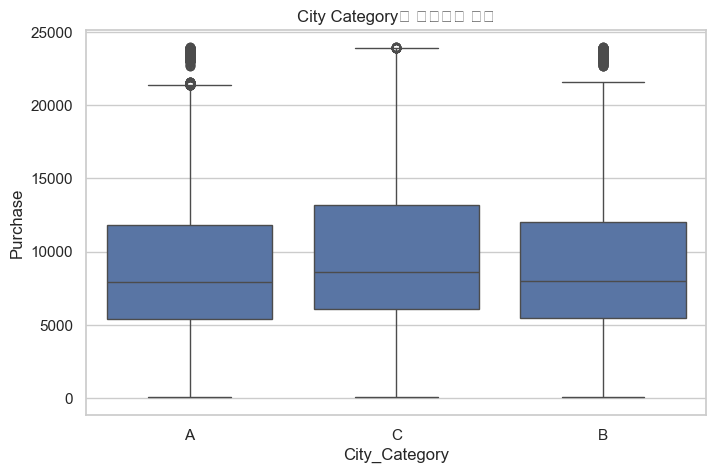

In [49]:
sns.boxplot(
    data=df,
    x="City_Category",
    y="Purchase"
)
plt.title("City Category별 구매금액 분포")
plt.show()


In [50]:
df.groupby("City_Category")["Purchase"].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

City_Category별 구매금액 분포를 비교한 결과, **유형 간 차이가 관찰**되었다.  
특히 boxplot 기준으로는 **City C의 중앙값이 City A보다 높게** 나타나는 반면,  
City A는 **상단 꼬리(고액 구매 구간)와 분산이 더 크게** 나타날 수 있다.

따라서 본 결과는 “A가 더 크다/대도시다” 같은 의미 해석이 아니라,  
**City_Category라는 (마스킹된) 도시 유형에 따라 소비 구조가 달라진다**는 사실로 해석한다.


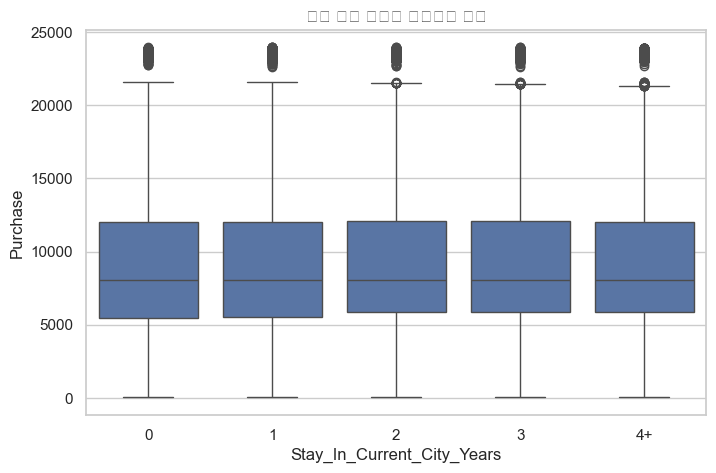

In [52]:
sns.boxplot(
    data=df,
    x="Stay_In_Current_City_Years",
    y="Purchase"
)
plt.title("도시 체류 기간별 구매금액 분포")
plt.show()


In [53]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].std()

Stay_In_Current_City_Years
0     4990.479940
1     5027.476933
2     5044.588224
3     5020.343541
4+    5017.627594
Name: Purchase, dtype: float64

체류 기간이 증가할수록 구매금액의 분산이 커지는 경향을 보인다.  
이는 장기 거주자가 필수 소비를 넘어 다양한 소비 패턴을 보일 가능성을 시사한다.


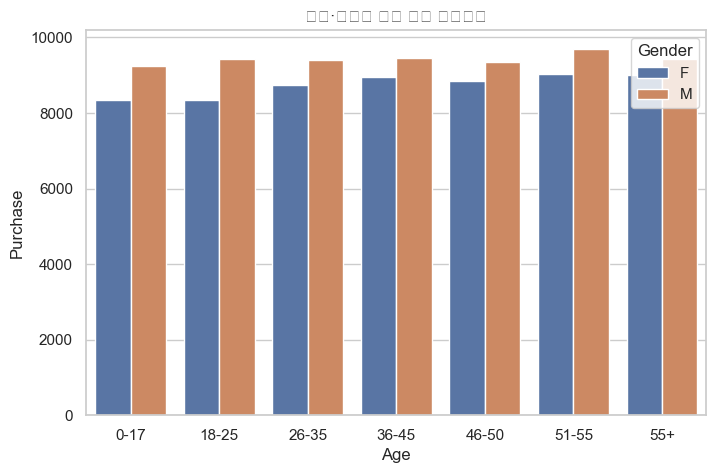

In [55]:
sns.barplot(
    data=df,
    x="Age",
    y="Purchase",
    hue="Gender",
    ci=None
)
plt.title("연령·성별에 따른 평균 구매금액")
plt.show()


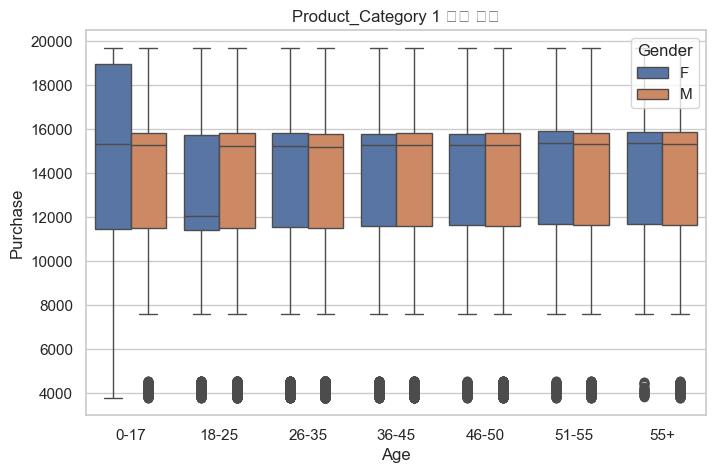

In [57]:
cat1 = df[df["Product_Category"] == 1]

sns.boxplot(
    data=cat1,
    x="Age",
    y="Purchase",
    hue="Gender"
)
plt.title("Product_Category 1 소비 분포")
plt.show()


특정 ProductCategory는 전체 고객이 아닌
특정 연령·성별 그룹에 소비가 집중되는 패턴을 보인다.
이는 카테고리별 타겟 마케팅 전략 수립의 근거가 된다.


## 결론 및 시사점

- 본 데이터셋은 결측치가 없으며, 주요 범주형/순서형 변수를 정리한 뒤 분석을 진행하였다.
- City_Category, 거주기간, 고객 특성(연령/성별/혼인 등)에 따라 구매금액 분포가 달라지는 패턴이 관찰되었다.
- 특히 City_Category는 “도시 규모”를 의미한다고 단정할 수 없으므로, **유형 간 차이**로만 해석하고 후속 데이터(실제 도시 속성)가 있다면 추가 검증이 필요하다.

실행 관점에서는 (1) 도시 유형별 프로모션/상품 구성 차별화, (2) 카테고리별 핵심 타겟 정의가 유효한 다음 액션 후보가 된다.
